In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
medianincome = pd.read_csv('MedianHouseholdIncome2015.csv')
proverty= pd.read_csv('PercentagePeopleBelowPovertyLevel.csv')
highschool= pd.read_csv('PercentOver25CompletedHighSchool.csv')
ShareRace= pd.read_csv('ShareRaceByCity.csv')
PoliceKilling= pd.read_csv('PoliceKillingsUS.csv')


In [3]:
medianincome.shape

(29322, 3)

In [4]:
# medianincome.dtypes

In [5]:
proverty.shape

(29329, 3)

In [6]:
# proverty.dtypes

In [7]:
merge = pd.merge(medianincome, proverty, how = 'outer', on = ['Geographic Area', 'City'])
merge2= pd.merge(merge, highschool, how = 'outer', on = ['Geographic Area', 'City'])
merge3= pd.merge(merge2, ShareRace, how = 'outer', on = ['Geographic Area', 'City'])

In [8]:
df= merge3
df

,Geographic Area,City,Median Income,poverty_rate,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,11207,78.8,21.2,67.2,30.2,0,0,1.6
1,AL,Abbeville city,25615,29.1,69.1,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,42575,25.5,78.9,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,37083,30.7,81.4,99.1,0.1,0,0.1,0.4
4,AL,Akron town,21667,42,68.6,13.2,86.5,0,0,0.3
5,AL,Alabaster city,71816,11.2,89.3,79.4,13.5,0.4,0.9,9
6,AL,Albertville city,32911,26.7,72.7,75.9,1.9,0.8,0.5,27.9
7,AL,Alexander City city,29874,30.4,78.1,62.2,32,0.2,0.9,4.8
8,AL,Alexandria CDP,56058,9.7,88.8,87.4,10.2,0.3,0.5,0.9
9,AL,Aliceville city,21131,41.3,74.3,22.6,74.9,0.1,0,1.2


In [9]:
pd.isnull(df).sum()

Geographic Area            0
City                       0
Median Income            206
poverty_rate             148
percent_completed_hs     148
share_white              209
share_black              209
share_native_american    209
share_asian              209
share_hispanic           209
dtype: int64

In [10]:
pd.isnull(df).sum()

Geographic Area            0
City                       0
Median Income            206
poverty_rate             148
percent_completed_hs     148
share_white              209
share_black              209
share_native_american    209
share_asian              209
share_hispanic           209
dtype: int64

In [11]:
df.replace('',np.nan, inplace=True)
df.dropna(inplace= True)

In [12]:
pd.isnull(df).sum()

Geographic Area          0
City                     0
Median Income            0
poverty_rate             0
percent_completed_hs     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

In [13]:
df.dtypes

Geographic Area          object
City                     object
Median Income            object
poverty_rate             object
percent_completed_hs     object
share_white              object
share_black              object
share_native_american    object
share_asian              object
share_hispanic           object
dtype: object

In [14]:
#cleaning data...
df['Median Income'].replace('(X)',0, inplace=True)
df['Median Income'].replace('-',0, inplace=True)
df['Median Income'].replace('2,500-',2500, inplace=True)
df['Median Income'].replace('250,000+',250000, inplace=True)
df['Median Income']= pd.to_numeric(df['Median Income'])
df['Median Income'].replace(0,df['Median Income'].mean(), inplace=True)

In [15]:
df['poverty_rate'].replace('-',0, inplace=True)
df['poverty_rate']= pd.to_numeric(df['poverty_rate'])
df['poverty_rate'].replace(0,df['poverty_rate'].mean(), inplace=True)
# df['poverty_rate']=df['poverty_rate']/100
# df['poverty_rate']= pd.Series(["{0:.2f}%".format(val * 100) for val in df['poverty_rate']], index = df.index)

In [16]:
df['percent_completed_hs'].replace('-',101, inplace=True)
df['percent_completed_hs']= pd.to_numeric(df['percent_completed_hs'])
df['percent_completed_hs'].replace(101,df['percent_completed_hs'].mean(), inplace=True)
# df['percent_completed_hs']=df['percent_completed_hs']/100
# df['percent_completed_hs']= pd.Series(["{0:.2f}%".format(val * 100) for val in df['percent_completed_hs']], index = df.index)

In [17]:
df['share_white'].replace('(X)',101, inplace=True)
df['share_white']= pd.to_numeric(df['share_white'])
df['share_white'].replace(101,df['share_white'].mean(), inplace=True)

df['share_black'].replace('(X)',101, inplace=True)
df['share_black']= pd.to_numeric(df['share_black'])
df['share_black'].replace(101,df['share_black'].mean(), inplace=True)

df['share_native_american'].replace('(X)',101, inplace=True)
df['share_native_american']= pd.to_numeric(df['share_native_american'])
df['share_native_american'].replace(101,df['share_native_american'].mean(), inplace=True)

df['share_asian'].replace('(X)',101, inplace=True)
df['share_asian']= pd.to_numeric(df['share_asian'])
df['share_asian'].replace(101,df['share_asian'].mean(), inplace=True)

df['share_hispanic'].replace('(X)',101, inplace=True)
df['share_hispanic']= pd.to_numeric(df['share_hispanic'])
df['share_hispanic'].replace(101,df['share_hispanic'].mean(), inplace=True)

In [18]:
df.describe()

,Median Income,poverty_rate,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic
count,29064.000000,29064.000000,29064.000000,29064.000000,29064.000000,29064.000000,29064.000000,29064.000000
mean,51117.600120,17.250743,85.726020,83.193438,6.853703,2.887234,1.542278,9.291301
std,24752.538517,12.566971,11.804227,21.668800,15.640273,12.706925,4.285782,17.480221
min,2500.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36250.000000,8.500000,81.100000,78.500000,0.100000,0.100000,0.000000,1.200000
50%,46719.000000,15.300000,88.300000,92.500000,0.800000,0.300000,0.400000,2.900000
75%,58000.000000,22.500000,93.500000,96.900000,4.300000,0.900000,1.200000,8.000000
max,250000.000000,100.000000,100.000000,100.000000,100.000000,100.000000,67.100000,100.000000


In [20]:
df

,Geographic Area,City,Median Income,poverty_rate,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,11207.0,78.80000,21.2,67.2,30.2,0.0,0.0,1.6
1,AL,Abbeville city,25615.0,29.10000,69.1,54.4,41.4,0.1,1.0,3.1
2,AL,Adamsville city,42575.0,25.50000,78.9,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,37083.0,30.70000,81.4,99.1,0.1,0.0,0.1,0.4
4,AL,Akron town,21667.0,42.00000,68.6,13.2,86.5,0.0,0.0,0.3
5,AL,Alabaster city,71816.0,11.20000,89.3,79.4,13.5,0.4,0.9,9.0
6,AL,Albertville city,32911.0,26.70000,72.7,75.9,1.9,0.8,0.5,27.9
7,AL,Alexander City city,29874.0,30.40000,78.1,62.2,32.0,0.2,0.9,4.8
8,AL,Alexandria CDP,56058.0,9.70000,88.8,87.4,10.2,0.3,0.5,0.9
9,AL,Aliceville city,21131.0,41.30000,74.3,22.6,74.9,0.1,0.0,1.2


In [21]:
#making sure City is consistant to police fatal csv
df['City']= df['City'].map(lambda x: x.rstrip('city'))
df['City']= df['City'].map(lambda x: x.rstrip('town'))
df['City']= df['City'].map(lambda x: x.rstrip('CDP'))


In [23]:
# df

In [25]:
df1= PoliceKilling

In [26]:
fatal_num = df1.groupby(["Geographic Area"])["id"].count().reset_index(name="number_of_police_fatal")

In [27]:
fatal_num

,Geographic Area,number_of_police_fatal
0,AK,15
1,AL,50
2,AR,26
3,AZ,118
4,CA,424
5,CO,74
6,CT,9
7,DC,11
8,DE,8
9,FL,154


In [29]:
merge4= pd.merge(merge3, fatal_num, how = 'outer', on = ['Geographic Area'])
merge4

,Geographic Area,City,Median Income,poverty_rate,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic,number_of_police_fatal
0,AL,Abanda,11207.0,78.80000,21.2,67.2,30.2,0.0,0.0,1.6,50
1,AL,Abbeville,25615.0,29.10000,69.1,54.4,41.4,0.1,1.0,3.1,50
2,AL,Adamsville,42575.0,25.50000,78.9,52.3,44.9,0.5,0.3,2.3,50
3,AL,Addison,37083.0,30.70000,81.4,99.1,0.1,0.0,0.1,0.4,50
4,AL,Akron,21667.0,42.00000,68.6,13.2,86.5,0.0,0.0,0.3,50
5,AL,Alabaster,71816.0,11.20000,89.3,79.4,13.5,0.4,0.9,9.0,50
6,AL,Albertville,32911.0,26.70000,72.7,75.9,1.9,0.8,0.5,27.9,50
7,AL,Alexander City,29874.0,30.40000,78.1,62.2,32.0,0.2,0.9,4.8,50
8,AL,Alexandria,56058.0,9.70000,88.8,87.4,10.2,0.3,0.5,0.9,50
9,AL,Aliceville,21131.0,41.30000,74.3,22.6,74.9,0.1,0.0,1.2,50


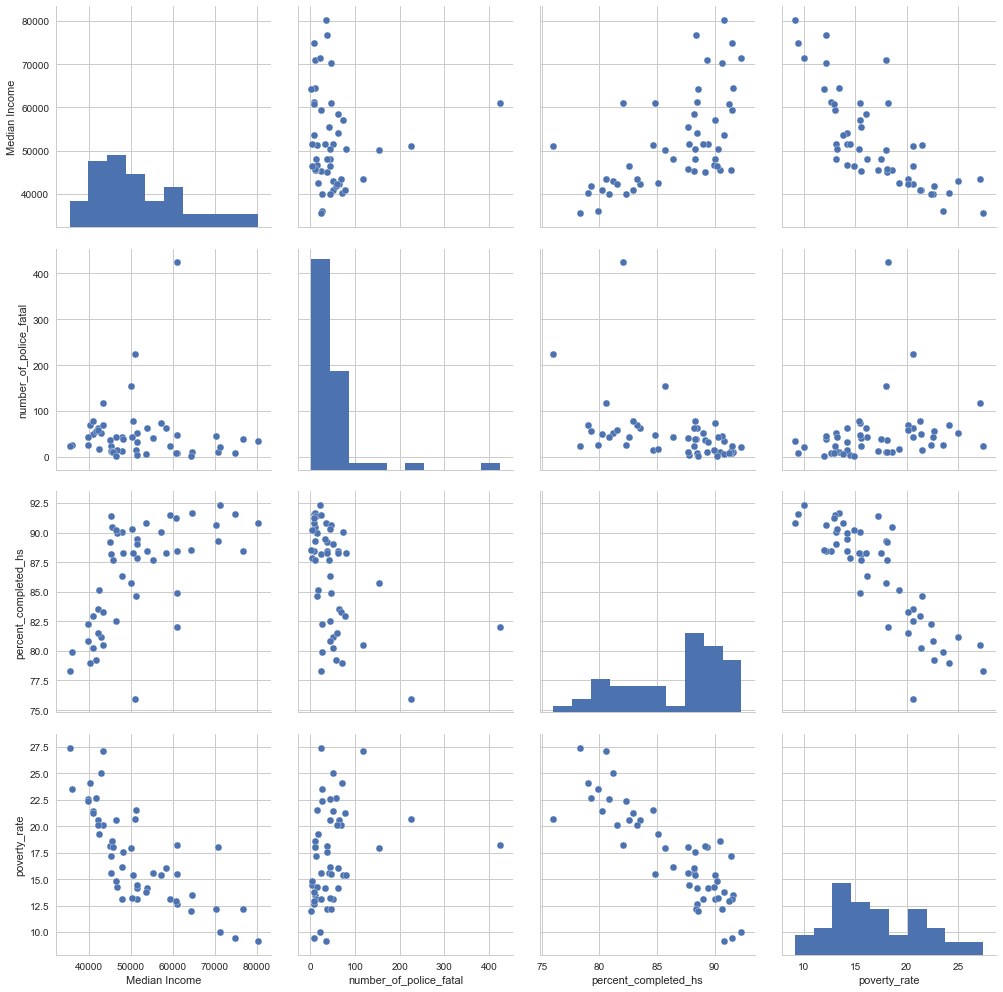

In [32]:
import seaborn as sns
#see if shootings has anything to do with income, hs grad, proverty rate
df= merge4.pivot_table(index = ['Geographic Area'])

sns.set(style = 'whitegrid', context = 'notebook')
cols = ['Median Income', 'number_of_police_fatal', 'percent_completed_hs', 'poverty_rate']
sns.pairplot(df[cols],size=3.5)
plt.show()

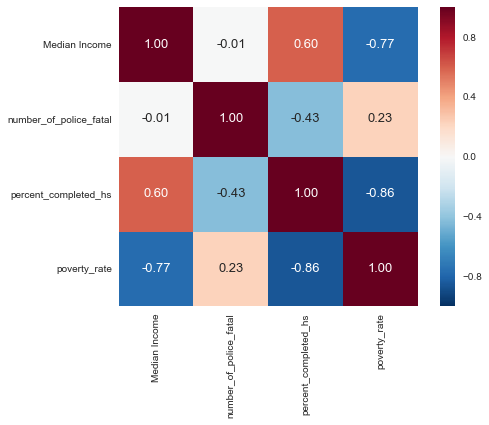

(4, 4)

In [33]:
cm = np.corrcoef(df[cols].values.T)  #use Numpy reshape df to matrix shape
hm = sns.heatmap(cm,
                cbar= True,
                annot= True,
                square= True,
                fmt= '.2f',
                annot_kws = {'size':13},
                yticklabels= cols,
                xticklabels= cols)
plt.show()
cm.shape

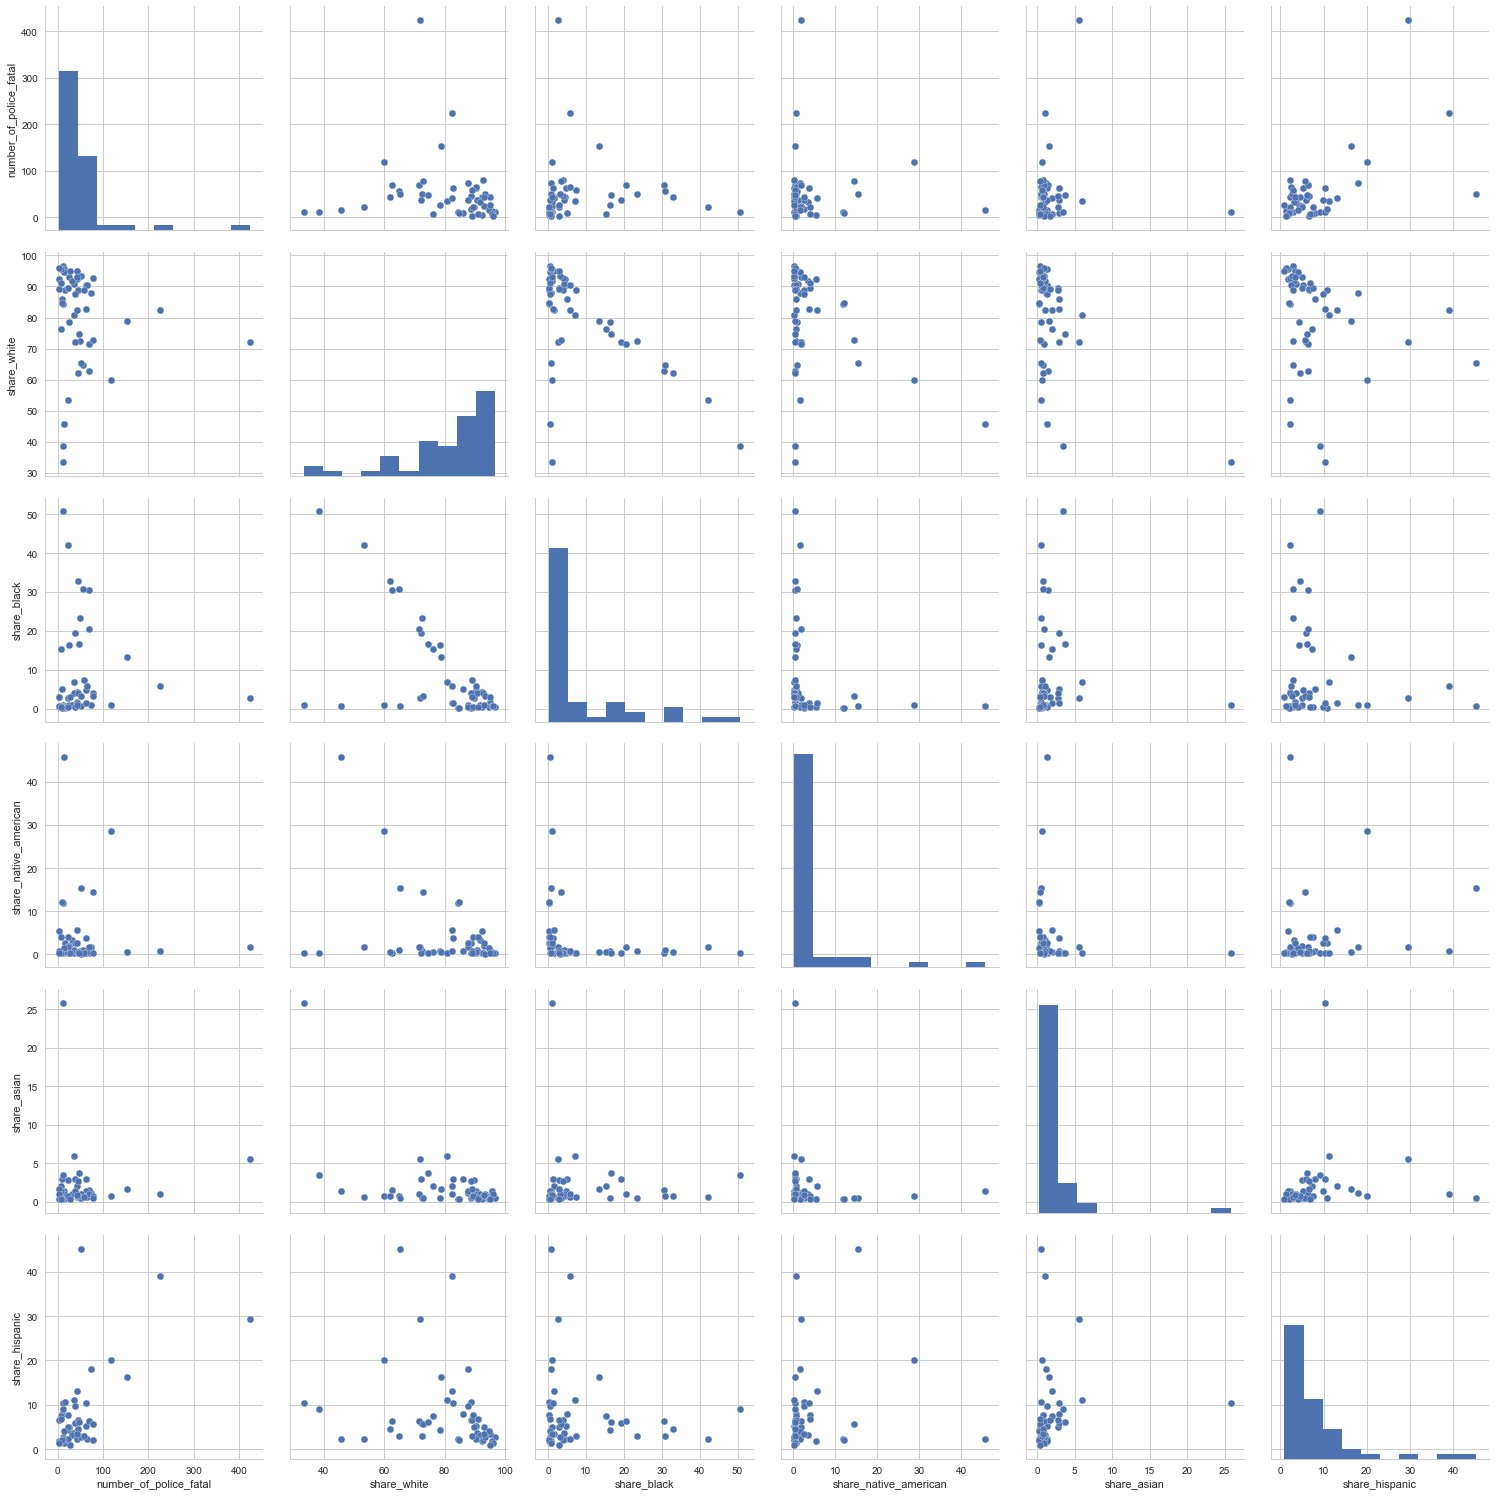

In [34]:
#explore if black lives matter
df=merge4.pivot_table(index = ['Geographic Area'])
sns.set(style = 'whitegrid', context = 'notebook')
cols = ['number_of_police_fatal','share_white','share_black','share_native_american','share_asian','share_hispanic']
sns.pairplot(df[cols],size=3.5)
plt.show()

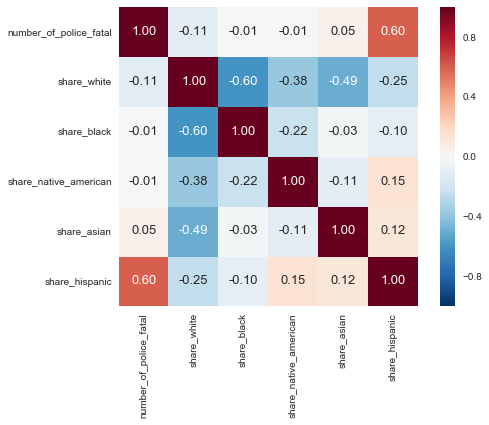

In [35]:
cm = np.corrcoef(df[cols].values.T)  #use Numpy reshape df to matrix shape
hm = sns.heatmap(cm,
                cbar= True,
                annot= True,
                square= True,
                fmt= '.2f',
                annot_kws = {'size':13},
                yticklabels= cols,
                xticklabels= cols)
plt.show()
# cm.shape

In [36]:
# df['number_of_police_fatal']= df.number_of_police_fatal.replace(np.NaN, 0)

In [37]:
df

,Median Income,number_of_police_fatal,percent_completed_hs,poverty_rate,share_asian,share_black,share_hispanic,share_native_american,share_white
Geographic Area,,,,,,,,,
AK,51282.982268,15,84.662593,21.486738,1.388984,0.616532,2.212023,45.740068,45.724684
AL,40938.931648,50,80.260514,21.404990,0.479549,23.359619,2.983882,0.659792,72.466205
AR,36093.532246,26,79.905773,23.481322,0.479516,16.362942,4.213222,0.753445,78.432030
AZ,43393.067704,118,80.531588,27.092796,0.713778,0.955778,20.098889,28.635333,59.951111
CA,61077.040199,424,82.032490,18.219215,5.538054,2.710452,29.424578,1.734253,71.993722
CO,57128.559162,74,90.014909,15.425045,1.147368,0.916886,17.959868,1.631360,87.744079
CT,74818.678488,9,91.549296,9.397199,2.973239,5.009859,7.995070,0.660563,86.084507
DC,70848.000000,11,89.300000,18.000000,3.500000,50.700000,9.100000,0.300000,38.500000
DE,61126.008851,8,88.468421,12.678947,2.000000,15.393421,7.417105,0.523684,76.246053


In [38]:
df.describe()

,Median Income,number_of_police_fatal,percent_completed_hs,poverty_rate,share_asian,share_black,share_hispanic,share_native_american,share_white
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,51878.761818,49.705882,86.475403,17.164974,1.841320,7.839105,7.743252,3.627756,80.953659
std,10895.366383,66.487080,4.332939,4.458510,3.647966,11.682134,8.877053,7.916142,15.180668
min,35485.609416,2.000000,75.969407,9.127693,0.291897,0.226997,0.904261,0.161796,33.452667
25%,43465.138464,14.000000,82.747268,13.619436,0.519553,0.801107,2.780478,0.328408,72.661497
50%,50185.103664,38.000000,88.256916,16.166449,0.925102,2.926065,5.073881,0.666067,87.601076
75%,58870.668648,58.000000,90.048011,20.612965,1.655648,7.129612,8.547535,2.609887,92.018170
max,80242.362296,424.000000,92.327526,27.412561,25.804000,50.700000,45.222222,45.740068,96.699305


In [ ]:
# df1.dtypes

In [ ]:
# clean_death = {"manner_of_death": {"shot": 0, "shot and Tasered": 1}}
# clean_gender = {"gender": {"M": 0, "F": 1}}
# clean_race = {"race": {"A": 0, "B": 1,"H": 2, "N": 3,"O": 4, "W": 5, "U": 6}}
# clean_illness = {"signs_of_mental_illness": {False: 0, True: 1}}
# clean_threat = {"threat_level": {"attack": 0, "other": 1,"undetermined": 2}}

In [ ]:
# df1.replace(clean_death, inplace= True)
# df1.replace(clean_gender, inplace= True)
# df1.replace(clean_race, inplace= True)
# df1.replace(clean_illness, inplace= True)
# df1.replace(clean_threat, inplace= True)
# df1.head()

In [ ]:
# group1= df1.groupby(['Geographic Area','City'])
# group1.max()

In [ ]:
# for (a,b), g in group1:
#     print((a,b))
#     print(g)
#     print('--------')

In [39]:
df1 = PoliceKilling
race = df1.groupby(['race'])

In [40]:
df1= race.count()

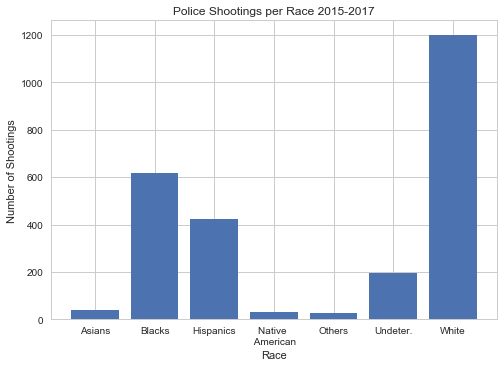

In [41]:
labels = ["Asians", "Blacks", "Hispanics","Native \n American","Others","Undeter.","White"]
x = [1,2,3,4,5,6,7]
y = df1['id']
plt.bar(x, y ,0.8)
plt.xticks(x,labels)
plt.title("Police Shootings per Race 2015-2017")
plt.ylabel('Number of Shootings')
plt.xlabel('Race')
plt.show()

In [45]:
df2= PoliceKilling
df2 = df2.pivot_table(index = ['race'],columns= ['threat_level'], values = ['id'], aggfunc= len)
# df2
df2= df2.div(df2.sum(1), axis=0) #this changes all the values into fractions out of 1


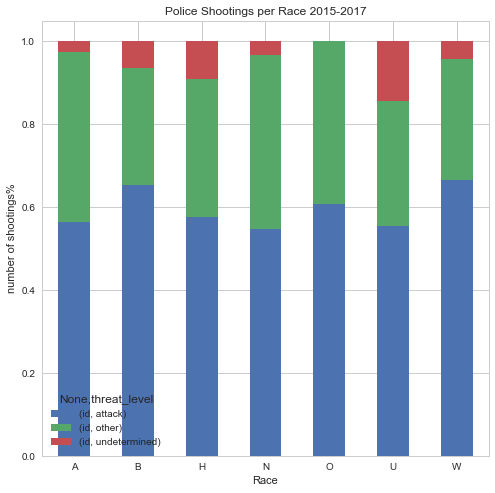

In [46]:
df2.plot(kind='bar', stacked=True, rot=1, figsize=(8, 8))
plt.title("Police Shootings per Race 2015-2017")
plt.ylabel('number of shootings%')
plt.xlabel('Race')
plt.show()

#According to black lives matters, below chart shows threat level to shootings happening in 
#percentage. Being other or undetermined and shot, blacks actually have a smaller %

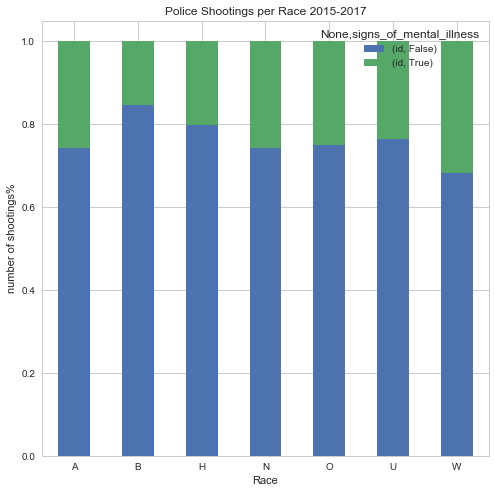

In [47]:
df3= PoliceKilling
df3 = df3.pivot_table(index = ['race'],columns= ['signs_of_mental_illness'], values = ['id'], aggfunc= len)
df3= df3.div(df3.sum(1), axis=0)
df3.plot(kind='bar', stacked=True, rot=1, figsize=(8, 8))
plt.title("Police Shootings per Race 2015-2017")
plt.ylabel('number of shootings%')
plt.xlabel('Race')
plt.show()

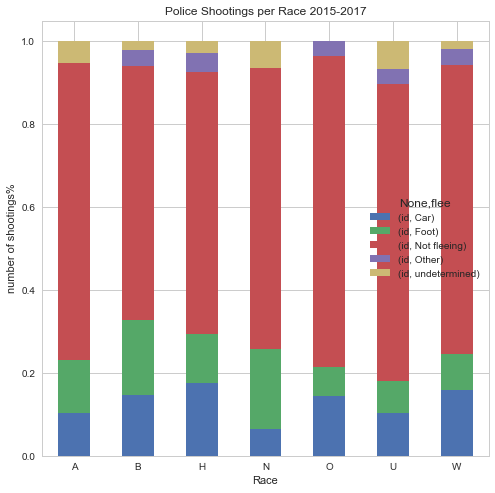

In [48]:
# Police Shooting happening if suspect was fleeing or not
df4 = PoliceKilling
df4 = df4.pivot_table(index = ['race'],columns= ['flee'], values = ['id'], aggfunc= len)
df4= df4.div(df4.sum(1), axis=0)
df4.plot(kind='bar', stacked=True, rot=1, figsize=(8, 8))
plt.title("Police Shootings per Race 2015-2017")
plt.ylabel('number of shootings%')
plt.xlabel('Race')
plt.show()

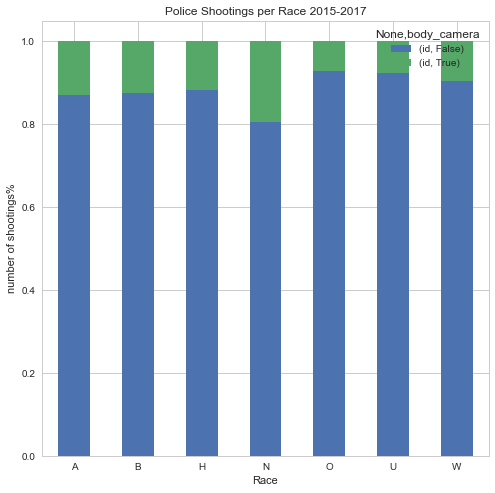

In [49]:
# Did police have body cam to prove that killing was legit?
df5 = PoliceKilling
df5 = df5.pivot_table(index = ['race'],columns= ['body_camera'], values = ['id'], aggfunc= len)
df5= df5.div(df5.sum(1), axis=0)
df5.plot(kind='bar', stacked=True, rot=1, figsize=(8, 8))
plt.title("Police Shootings per Race 2015-2017")
plt.ylabel('number of shootings%')
plt.xlabel('Race')
plt.show()

#having a body cam wasn't general dealing with all races

In [ ]:
# which states have the highest racial shootings according to state juristiction?
# df6 = PoliceKilling
# df6 = df6.pivot_table(index = ['Geographic Area'],columns= ['race'], values = ['City'], aggfunc= len)
# df6